우리가 학습했던 모델은 Class는 상당히 잘 구별하지만, Bounding Box는 잘 잡지 못하고 있는 것 같습니다. 이유가 무엇일지 고민해본 다음, 다음의 Pre-trained 모델에서 결과를 살펴봅시다.

In [1]:
from torchvision import transforms
from materials.utils import *
from materials.SSD300 import SSD300
from materials.detection import ssd_detect
from PIL import Image, ImageDraw, ImageFont

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model checkpoint
checkpoint = './weights/pretrained_SSD300.pth'
model = SSD300(n_classes=20)
model.load_state_dict(torch.load(checkpoint))
model = model.to(device)
model.eval()

# Transforms
resize = transforms.Resize((300, 300))
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


Loaded base model.



In [31]:
import warnings
warnings.filterwarnings("ignore")

img_path = './img/zzz.png'
original_image = Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')
annotated_image = ssd_detect(original_image, model, min_score=0.3, max_overlap=0.5, top_k=200)

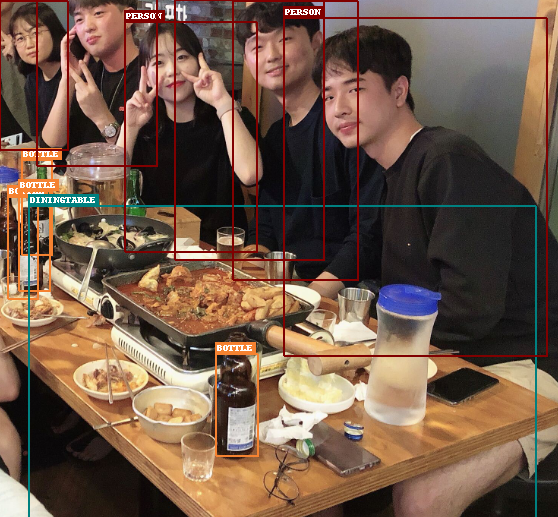

In [32]:
annotated_image

----------
### 인공지능 학습의 과정

이번 실습까지 포함하여 여러분들은 다음의 과정을 거쳤습니다.

1. 데이터 준비하기
    - 데이터 Pre-processing 및 Dataset 구성
    - DataLoader 및 Batch 구성
    
2. 모델 만들기
    - 모델을 구성할 모듈 만들기
    - 모듈을 쌓아 모델 완성하기
    
3. 학습하기
    - 손실함수 설정하기
    - 학습 Loop 만들기
    - HyperParameter 설정하기
    - 학습하기
    
4. 평가하기
    - 테스트 데이터에서 평가하기

현재까지의 과정을 인공지능 학습의 전형적인 파이프라인(Pipeline)이라고 할 수 있습니다. 여기에 평가항목을 수치화하고 수치화한 결과값을 바탕으로 모델을 개선해 나가는 과정과 어플리케이션(Application)에 적용하는 단계를 반복하면서 인공지능을 산업에서 활용하게 됩니다.
